In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Load Data

In [2]:
ad=pd.read_csv(r"Z:\Purva226518_2sem\Machine Lear\Assignment 6\Ad Click Data.csv")
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


# Missing Values?

In [3]:
ad.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [4]:
ad=ad.dropna()

In [5]:
ad.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Data Visualization

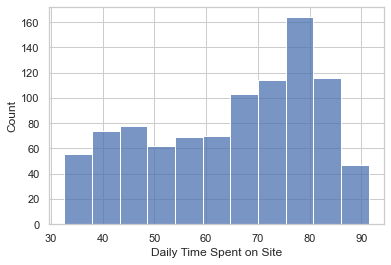

In [6]:
sns.histplot(x='Daily Time Spent on Site',data=ad);

Most customers have 70-85 mins of daily time spent on their sites

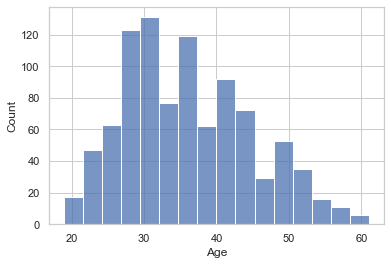

In [7]:
sns.histplot(x='Age',data=ad);

Most customers visiting the site are between age 28-35 years

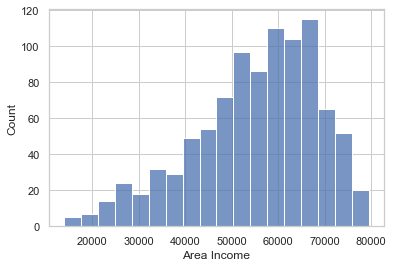

In [8]:
sns.histplot(x='Area Income',data=ad);

Most customers live in areas having avg. area income between 5000-7000

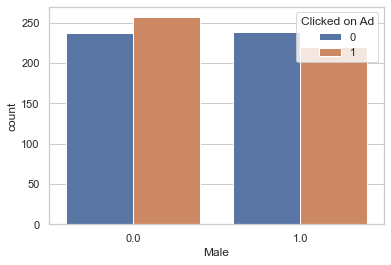

In [9]:
sns.countplot(x='Male',hue='Clicked on Ad',data=ad);

The distributions of gender w.r.t. clicking on Ad is similar

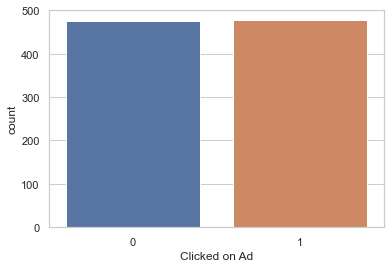

In [10]:
sns.countplot(x='Clicked on Ad',data=ad);

Equal distribution of customers click on the ad

# Correlation Matrix

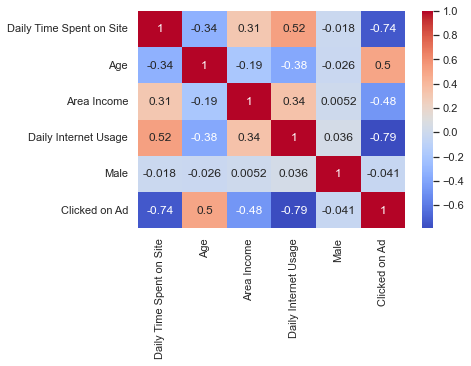

In [11]:
sns.heatmap(ad.corr(),cmap='coolwarm',annot=True);

1. It seems from the barplot as well as correlation matrix that Gender has no effect on clicking of ads.

2. Daily Time Spent on the site, Daily Internet Usage and Area Income are moderately negatively correlated with 
   Clicking on Ads which means as these feature values decrease such customers tend to click on the Ads.
    
3. Age is positively correlated with Clicking on Ads which means as Age increases such customers tend to click on the Ads.


# Feature Selection

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(RandomForestClassifier())
rfe = rfe.fit(x, y )
print(rfe.support_)
print(rfe.ranking_)

In [12]:
x=np.array(ad[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']])
y=np.array(ad['Clicked on Ad'])

# Train-Test Split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train

array([[8.111000e+01, 3.900000e+01, 5.621657e+04, 2.481900e+02],
       [3.810000e+01, 3.400000e+01, 6.064109e+04, 2.143800e+02],
       [6.736000e+01, 3.700000e+01, 7.310447e+04, 2.335600e+02],
       ...,
       [4.204000e+01, 4.900000e+01, 6.732300e+04, 1.821100e+02],
       [5.616000e+01, 2.500000e+01, 6.642984e+04, 1.642500e+02],
       [6.895000e+01, 5.100000e+01, 7.462327e+04, 1.858500e+02]])

# Random Forest

In [14]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

# Predict The Results

In [15]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [16]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
      dtype=int64)

# Check Accuracy

In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9545


Both the sets have similar accuracy but since training set has accuracy 1 it seems to be overfitted

# K-fold Validation

In [18]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for training set: %.3f" % (results.mean()))

10-fold cross validation average accuracy for training set: 0.966


In [19]:
results = model_selection.cross_val_score(modelCV, x_test, y_test, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for testing set: %.3f" % (results.mean()))

10-fold cross validation average accuracy for testing set: 0.969


# Confusion Matrix

In [20]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[146   3]
 [ 10 127]]

True Positives(TP) =  146

True Negatives(TN) =  127

False Positives(FP) =  3

False Negatives(FN) =  10


<AxesSubplot:>

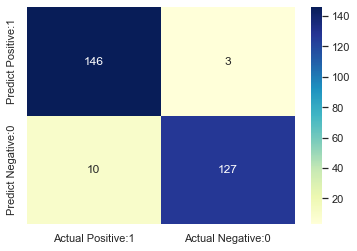

In [21]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       149
           1       0.98      0.93      0.95       137

    accuracy                           0.95       286
   macro avg       0.96      0.95      0.95       286
weighted avg       0.96      0.95      0.95       286



# Classification accuracy

In [23]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [24]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9545
